In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [63]:
df = pd.read_csv('/Users/ayushpatel/Projects/ML/new_preprocessed_loan_data.csv')
df.head()

,Unnamed: 0,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Annual_Income,Debt_to_Income_Ratio,Verification_Status,...,Public_Record,Total_Accounts,Total_Received_Principal,Total_Received_Interest,Purpose,Loan_Status,Issue_Month,Issue_Year,region,Risk_Category
0,0,5000.0,10.65,162.87,36,10.0,RENT,24000.0,27.65,Verified,...,0.0,9.0,5000.00,861.07,credit_card,Fully Paid,Dec,2011,SouthWest,Low Risk
1,1,2500.0,15.27,59.83,60,0.5,RENT,30000.0,1.00,Source Verified,...,0.0,4.0,456.46,435.17,car,Charged Off,Dec,2011,SouthEast,High Risk
2,2,2400.0,15.96,84.33,36,10.0,RENT,12252.0,8.72,Not Verified,...,0.0,10.0,2400.00,603.65,small_business,Fully Paid,Dec,2011,MidWest,Low Risk
3,3,10000.0,13.49,339.31,36,10.0,RENT,49200.0,20.00,Source Verified,...,0.0,37.0,10000.00,2209.33,other,Fully Paid,Dec,2011,West,Low Risk
4,4,5000.0,7.90,156.46,36,3.0,RENT,36000.0,11.20,Source Verified,...,0.0,12.0,5000.00,631.38,wedding,Fully Paid,Dec,2011,SouthWest,Low Risk


In [64]:
df.dropna(inplace=True)

In [65]:
df.drop('Unnamed: 0', axis=1)

,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Annual_Income,Debt_to_Income_Ratio,Verification_Status,Grade,...,Public_Record,Total_Accounts,Total_Received_Principal,Total_Received_Interest,Purpose,Loan_Status,Issue_Month,Issue_Year,region,Risk_Category
0,5000.0,10.65,162.87,36,10.0,RENT,24000.0,27.65,Verified,B,...,0.0,9.0,5000.00,861.07,credit_card,Fully Paid,Dec,2011,SouthWest,Low Risk
1,2500.0,15.27,59.83,60,0.5,RENT,30000.0,1.00,Source Verified,C,...,0.0,4.0,456.46,435.17,car,Charged Off,Dec,2011,SouthEast,High Risk
2,2400.0,15.96,84.33,36,10.0,RENT,12252.0,8.72,Not Verified,C,...,0.0,10.0,2400.00,603.65,small_business,Fully Paid,Dec,2011,MidWest,Low Risk
3,10000.0,13.49,339.31,36,10.0,RENT,49200.0,20.00,Source Verified,C,...,0.0,37.0,10000.00,2209.33,other,Fully Paid,Dec,2011,West,Low Risk
4,5000.0,7.90,156.46,36,3.0,RENT,36000.0,11.20,Source Verified,A,...,0.0,12.0,5000.00,631.38,wedding,Fully Paid,Dec,2011,SouthWest,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266023,17000.0,15.99,413.32,60,10.0,MORTGAGE,63078.0,31.70,Source Verified,D,...,0.0,28.0,16999.99,196.53,debt_consolidation,Fully Paid,Jan,2015,NorthEast,Low Risk
266024,4200.0,15.99,147.64,36,10.0,MORTGAGE,48000.0,36.93,Verified,D,...,0.0,45.0,667.96,358.06,medical,Charged Off,Jan,2015,West,High Risk
266025,10775.0,6.03,327.95,36,0.5,RENT,54000.0,13.22,Not Verified,A,...,0.0,21.0,10775.00,296.87,debt_consolidation,Fully Paid,Jan,2015,SouthEast,Low Risk
266026,6225.0,16.49,220.37,36,2.0,RENT,27000.0,18.58,Source Verified,D,...,0.0,4.0,6225.00,825.46,debt_consolidation,Fully Paid,Jan,2015,SouthEast,Low Risk


In [66]:
df['Verification_Status'] = df['Verification_Status'].replace('Source Verified', 'Verified')

In [67]:
df = df[df['Home_Ownership'] != 'NONE']
df = df[df['Home_Ownership'] != 'ANY']

In [68]:
columns_to_drop = ['Delinquency_2yrs', 'Total_Accounts','Sub_Grade',
       'Total_Received_Principal', 'Total_Received_Interest',
                   'Loan_Status', 'Issue_Month', 'Issue_Year', 'region',
                   'Public_Record', 'Annual_Income']
                   # 'Debt_to_Income_Ratio','Installment''Open_Accounts',
df = df.drop(columns=columns_to_drop)

In [69]:
df.columns


Index(['Unnamed: 0', 'Loan_Amount', 'Interest_Rate', 'Installment',
       'Terms(Months)', 'Employment_Length', 'Home_Ownership',
       'Debt_to_Income_Ratio', 'Verification_Status', 'Grade', 'Open_Accounts',
       'Purpose', 'Risk_Category'],
      dtype='object')

In [70]:
df['Purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['Purpose']
df = pd.get_dummies(df, columns=nominal_columns)

In [72]:
le_verification_status = LabelEncoder()
df['Verification_Status'] = le_verification_status.fit_transform(df['Verification_Status'])

In [73]:
le_grade = LabelEncoder()
df['Grade'] = le_grade.fit_transform(df['Grade'])

le_home_ownership=LabelEncoder()
df['Home_Ownership'] = le_home_ownership.fit_transform(df['Home_Ownership'])


In [74]:
verification_status_mapping = dict(zip(le_verification_status.classes_, le_verification_status.transform(le_verification_status.classes_)))
grade_mapping = dict(zip(le_grade.classes_, le_grade.transform(le_grade.classes_)))
home_ownership_mapping = dict(zip(le_home_ownership.classes_, le_home_ownership.transform(le_home_ownership.classes_)))

print("Verification Status Mapping:", verification_status_mapping)
print("Grade Mapping:", grade_mapping)
print("Home Ownership Mapping:", home_ownership_mapping)

Verification Status Mapping: {'Not Verified': np.int64(0), 'Verified': np.int64(1)}
Grade Mapping: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6)}
Home Ownership Mapping: {'MORTGAGE': np.int64(0), 'OTHER': np.int64(1), 'OWN': np.int64(2), 'RENT': np.int64(3)}


In [75]:
df.head()

,Unnamed: 0,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Debt_to_Income_Ratio,Verification_Status,Grade,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,5000.0,10.65,162.87,36,10.0,3,27.65,1,1,...,False,False,False,False,False,False,False,False,False,False
1,1,2500.0,15.27,59.83,60,0.5,3,1.00,1,2,...,False,False,False,False,False,False,False,False,False,False
2,2,2400.0,15.96,84.33,36,10.0,3,8.72,0,2,...,False,False,False,False,False,False,False,True,False,False
3,3,10000.0,13.49,339.31,36,10.0,3,20.00,1,2,...,False,False,False,False,False,True,False,False,False,False
4,4,5000.0,7.90,156.46,36,3.0,3,11.20,1,0,...,False,False,False,False,False,False,False,False,False,True


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255324 entries, 0 to 266027
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  255324 non-null  int64  
 1   Loan_Amount                 255324 non-null  float64
 2   Interest_Rate               255324 non-null  float64
 3   Installment                 255324 non-null  float64
 4   Terms(Months)               255324 non-null  int64  
 5   Employment_Length           255324 non-null  float64
 6   Home_Ownership              255324 non-null  int64  
 7   Debt_to_Income_Ratio        255324 non-null  float64
 8   Verification_Status         255324 non-null  int64  
 9   Grade                       255324 non-null  int64  
 10  Open_Accounts               255324 non-null  float64
 11  Risk_Category               255324 non-null  object 
 12  Purpose_car                 255324 non-null  bool   
 13  Purpose_credit_card

In [77]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255324 entries, 0 to 266027
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Loan_Amount                 255324 non-null  float64
 1   Interest_Rate               255324 non-null  float64
 2   Installment                 255324 non-null  float64
 3   Terms(Months)               255324 non-null  int64  
 4   Employment_Length           255324 non-null  float64
 5   Home_Ownership              255324 non-null  int64  
 6   Debt_to_Income_Ratio        255324 non-null  float64
 7   Verification_Status         255324 non-null  int64  
 8   Grade                       255324 non-null  int64  
 9   Open_Accounts               255324 non-null  float64
 10  Risk_Category               255324 non-null  object 
 11  Purpose_car                 255324 non-null  bool   
 12  Purpose_credit_card         255324 non-null  bool   
 13  Purpose_debt_consol

In [79]:
df_new=df.copy()

In [80]:
df_new['Risk_Category'].value_counts()

Risk_Category
Low Risk         192309
High Risk         53242
Moderate Risk      9773
Name: count, dtype: int64

In [81]:
df_new['Risk_Category'].value_counts()

Risk_Category
Low Risk         192309
High Risk         53242
Moderate Risk      9773
Name: count, dtype: int64

In [82]:
risk_mapping = {
    'High Risk': 2,
    'Moderate Risk': 1,
    'Low Risk': 0
}

df_new['Risk_Category'] = df_new['Risk_Category'].map(risk_mapping)

In [83]:
df_new.columns

Index(['Loan_Amount', 'Interest_Rate', 'Installment', 'Terms(Months)',
       'Employment_Length', 'Home_Ownership', 'Debt_to_Income_Ratio',
       'Verification_Status', 'Grade', 'Open_Accounts', 'Risk_Category',
       'Purpose_car', 'Purpose_credit_card', 'Purpose_debt_consolidation',
       'Purpose_educational', 'Purpose_home_improvement', 'Purpose_house',
       'Purpose_major_purchase', 'Purpose_medical', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

<Axes: ylabel='Interest_Rate'>

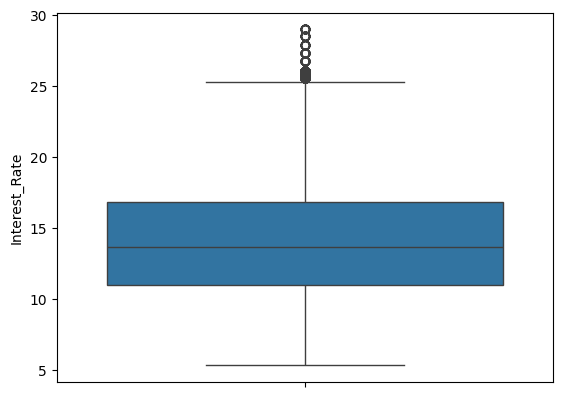

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df_new['Interest_Rate'])

In [85]:
def remove_outliers_iqr(df_new, columns):

    for column in columns:
        Q1 = df_new[column].quantile(0.25)
        Q3 = df_new[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_new = df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
    return df_new

columns_to_check = ['Loan_Amount', 'Interest_Rate','Employment_Length']
df_new = remove_outliers_iqr(df_new, columns_to_check)


<Axes: ylabel='Interest_Rate'>

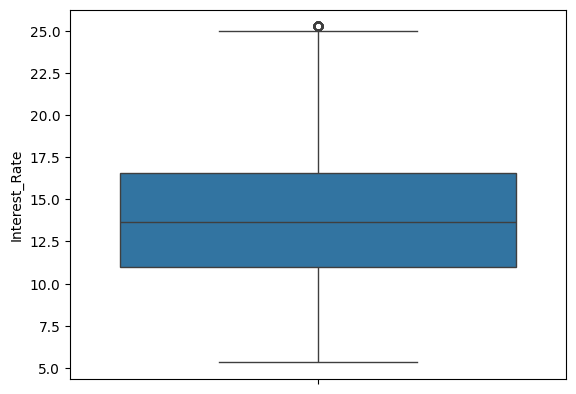

In [86]:
sns.boxplot(df_new['Interest_Rate'],whis=1.5)

In [87]:
df_new['Terms(Months)'].value_counts()

Terms(Months)
36    194428
60     58775
Name: count, dtype: int64

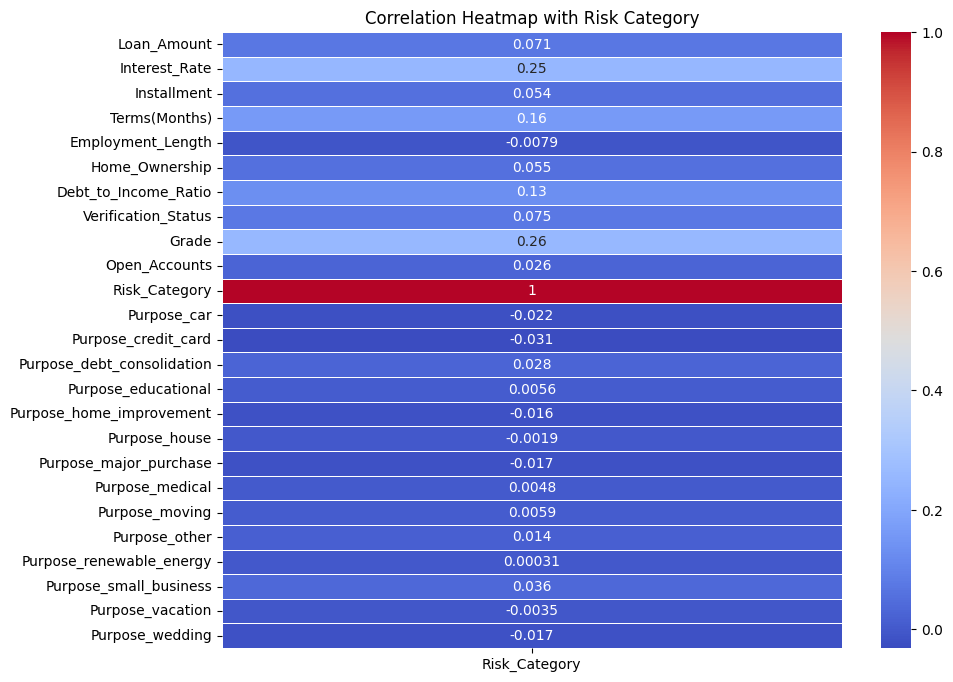

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame with the 'Risk_Category' and other relevant columns

# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Extract the correlation of each feature with the 'Risk_Category'
risk_category_corr = correlation_matrix[['Risk_Category']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(risk_category_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Risk Category')
plt.show()


In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253203 entries, 0 to 266027
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Loan_Amount                 253203 non-null  float64
 1   Interest_Rate               253203 non-null  float64
 2   Installment                 253203 non-null  float64
 3   Terms(Months)               253203 non-null  int64  
 4   Employment_Length           253203 non-null  float64
 5   Home_Ownership              253203 non-null  int64  
 6   Debt_to_Income_Ratio        253203 non-null  float64
 7   Verification_Status         253203 non-null  int64  
 8   Grade                       253203 non-null  int64  
 9   Open_Accounts               253203 non-null  float64
 10  Risk_Category               253203 non-null  int64  
 11  Purpose_car                 253203 non-null  bool   
 12  Purpose_credit_card         253203 non-null  bool   
 13  Purpose_debt_consol

In [90]:
feature_columns = df_new.columns[df_new.columns != 'Risk_Category']
target_column = 'Risk_Category'

In [91]:
X = df_new[feature_columns]
y = df_new[target_column]

In [92]:
X

,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Debt_to_Income_Ratio,Verification_Status,Grade,Open_Accounts,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,5000.0,10.65,162.87,36,10.0,3,27.65,1,1,3.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,60,0.5,3,1.00,1,2,3.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,36,10.0,3,8.72,0,2,2.0,...,False,False,False,False,False,False,False,True,False,False
3,10000.0,13.49,339.31,36,10.0,3,20.00,1,2,10.0,...,False,False,False,False,False,True,False,False,False,False
4,5000.0,7.90,156.46,36,3.0,3,11.20,1,0,9.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266023,17000.0,15.99,413.32,60,10.0,0,31.70,1,3,8.0,...,False,False,False,False,False,False,False,False,False,False
266024,4200.0,15.99,147.64,36,10.0,0,36.93,1,3,13.0,...,False,False,False,True,False,False,False,False,False,False
266025,10775.0,6.03,327.95,36,0.5,3,13.22,0,0,9.0,...,False,False,False,False,False,False,False,False,False,False
266026,6225.0,16.49,220.37,36,2.0,3,18.58,1,3,3.0,...,False,False,False,False,False,False,False,False,False,False


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
X_scaled

array([[-1.06963604, -0.73836692, -1.05681149, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-1.37539683,  0.33673064, -1.47627628, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-1.38762726,  0.49729715, -1.3765394 , ...,  7.21527148,
        -0.07835358, -0.08725089],
       ...,
       [-0.36332861, -1.81346447, -0.38478851, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-0.91981325,  0.62063086, -0.82273515, ..., -0.13859492,
        -0.07835358, -0.08725089],
       [-1.19194035, -1.19912301, -1.20450348, ..., -0.13859492,
        -0.07835358, -0.08725089]])

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [98]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
y_pred = clf.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7497794921077922
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     57477
           1       0.55      0.03      0.06      2860
           2       0.39      0.10      0.16     15624

    accuracy                           0.75     75961
   macro avg       0.57      0.36      0.36     75961
weighted avg       0.68      0.75      0.68     75961



In [101]:
y_pred_proba = clf.predict_proba(X_test)

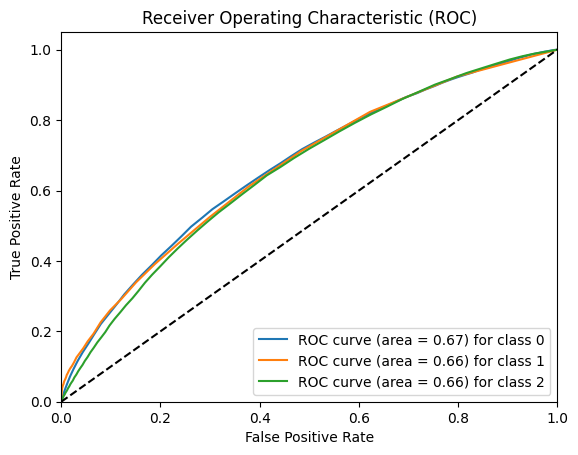

In [102]:
from sklearn.metrics import roc_curve,auc

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[55302    28  2147]
 [ 2515    89   256]
 [14016    45  1563]]


<Axes: >

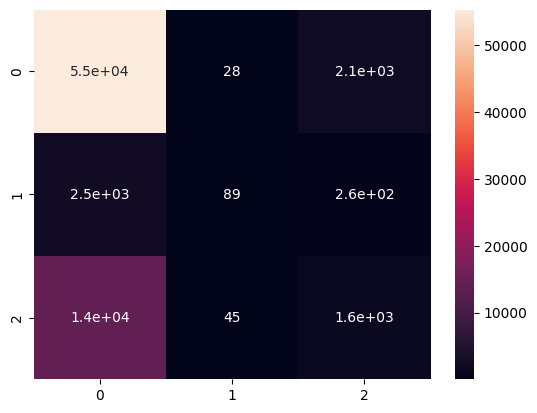

In [104]:
sns.heatmap(cm,annot=True)

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [106]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['none', 'l2'],

}

In [107]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [108]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,scoring='accuracy', cv=2,n_jobs=-1,verbose=3)

In [109]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 2/2] END ...............C=0.001, penalty=none;, score=nan total time=   0.0s
[CV 2/2] END ................C=0.01, penalty=none;, score=nan total time=   0.0s
[CV 1/2] END ...............C=0.001, penalty=none;, score=nan total time=   0.1s
[CV 1/2] END ................C=0.01, penalty=none;, score=nan total time=   0.1s
[CV 1/2] END .................C=0.1, penalty=none;, score=nan total time=   0.0s
[CV 2/2] END .................C=0.1, penalty=none;, score=nan total time=   0.0s
[CV 1/2] END ...................C=1, penalty=none;, score=nan total time=   0.0s
[CV 2/2] END ...................C=1, penalty=none;, score=nan total time=   0.0s
[CV 2/2] END ...............C=0.001, penalty=l2;, score=0.756 total time=   0.5s
[CV 1/2] END ...............C=0.001, penalty=l2;, score=0.756 total time=   0.6s
[CV 1/2] END ..................C=10, penalty=none;, score=nan total time=   0.0s
[CV 2/2] END ..................C=10, penalty=non

/Users/ayushpatel/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ayushpatel/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ayushpatel/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ayushpatel/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_params
    validate

GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l2']},
             scoring='accuracy', verbose=3)

In [110]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Score: 0.756660385236005


In [111]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Best Model Performance:
Accuracy: 0.7566514395545082
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     57477
           1       0.40      0.02      0.03      2860
           2       0.46      0.07      0.13     15624

    accuracy                           0.76     75961
   macro avg       0.54      0.36      0.34     75961
weighted avg       0.69      0.76      0.68     75961



In [112]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100,)

In [113]:
import joblib
model_path = 'xgb_model.pkl'
joblib.dump(xgb_clf, model_path)

print(f"Model saved to {model_path}")

Model saved to xgb_model.pkl


In [114]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [115]:
smote=SMOTE()
rus=RandomUnderSampler()

In [116]:
y.value_counts()

Risk_Category
0    191332
2     52269
1      9602
Name: count, dtype: int64

In [117]:
X_resampled,y_resampled=smote.fit_resample(X_scaled,y)

In [118]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.5,test_size=0.15, random_state=42, )

In [119]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
svc_clf = XGBClassifier(random_state=42)
svc_clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [120]:
from sklearn.metrics import classification_report
y_pred_svc = svc_clf.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred_svc))

              precision    recall  f1-score   support

           0       0.72      0.93      0.82     28791
           1       0.76      0.73      0.74     28913
           2       0.66      0.49      0.56     28396

    accuracy                           0.72     86100
   macro avg       0.71      0.72      0.71     86100
weighted avg       0.71      0.72      0.71     86100

